In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
# Load dataset
data = pd.read_csv('https://www.statlearning.com/s/Advertising.csv',index_col=0)  # Example: area, bedrooms, location_score, price

X = data.drop(columns=['sales'])
y = data['sales']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Summary of the model
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.58e-96
Time:                        06:53:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

<Axes: >

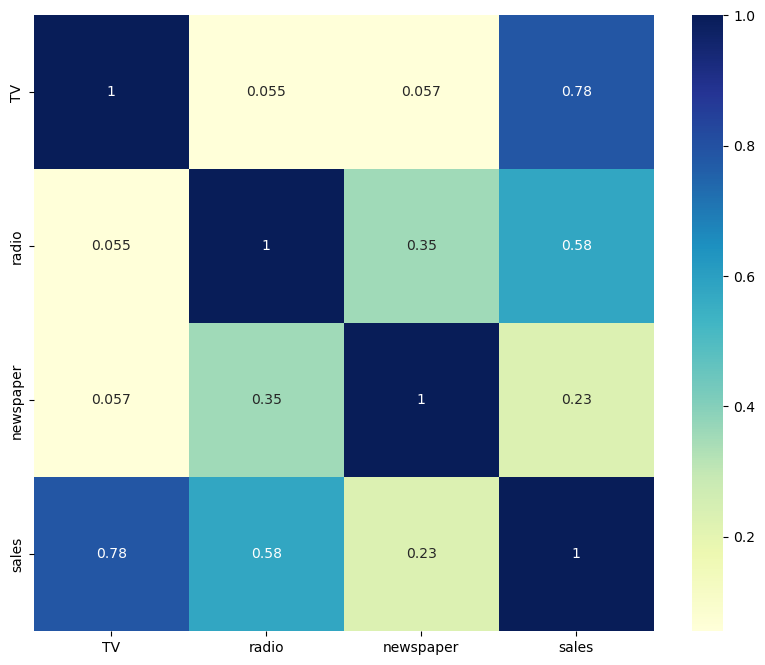

In [3]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)

Text(0.5, 1.0, 'newspaper vs Sales')

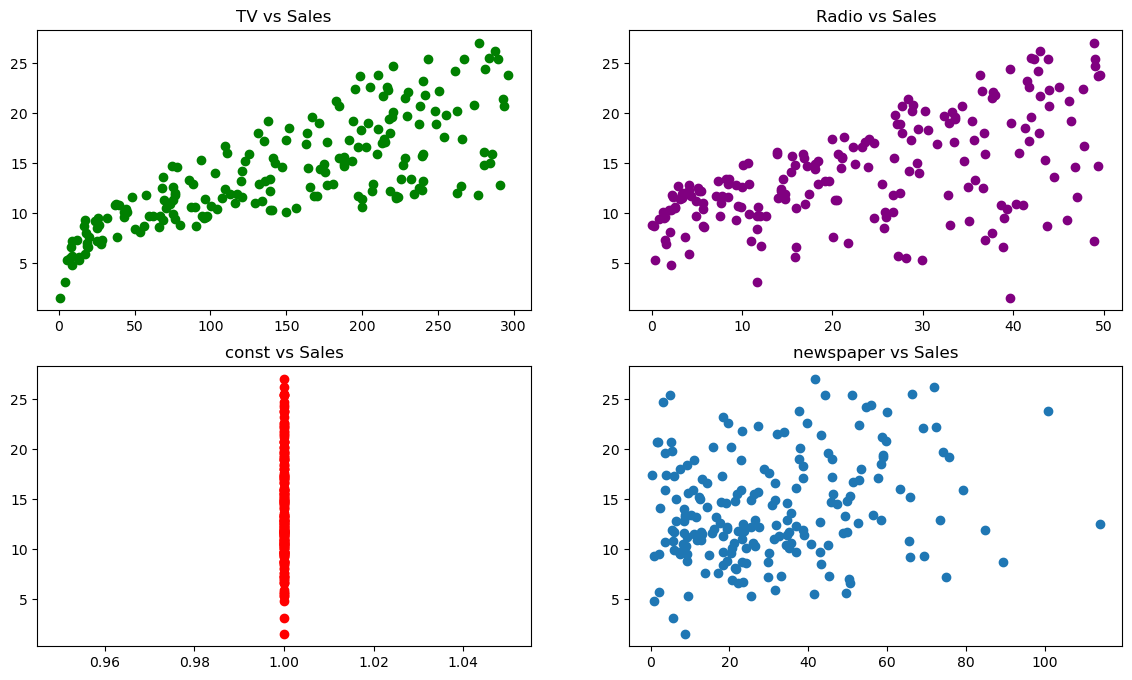

In [4]:
fig, axes = plt.subplots(2,2,figsize=(14,8))
axes[0,0].scatter(X.TV,y,color='g')
axes[0,0].set_title("TV vs Sales")
axes[0,1].scatter(X.radio,y,color='purple')
axes[0,1].set_title("Radio vs Sales")
axes[1,0].scatter(X.const,y,color='r')
axes[1,0].set_title("const vs Sales")
axes[1,1].scatter(X.newspaper,y)
axes[1,1].set_title("newspaper vs Sales")


In [5]:
X['preds'] = model.predict(X)

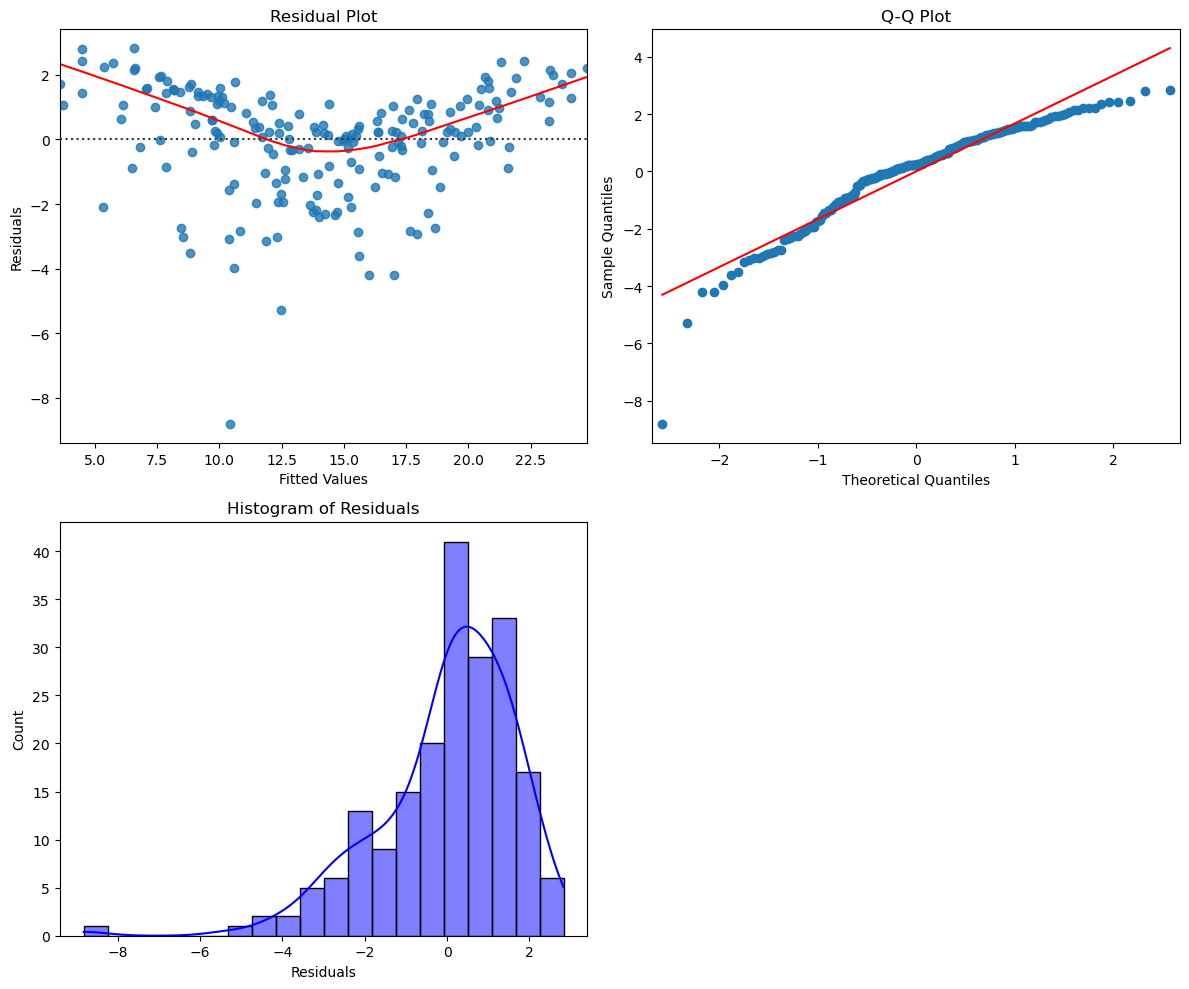

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # Required for the Q-Q plot

# Assume `model` is your fitted regression model
residuals = model.resid

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Residual plot
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1.5}, ax=axes[0, 0])
axes[0, 0].set_title('Residual Plot')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')

# Q-Q plot for normality
sm.qqplot(residuals, line='s', ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# Histogram of residuals
sns.histplot(residuals, kde=True, bins=20, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Residuals')
axes[1, 0].set_xlabel('Residuals')

# Turn off the unused subplot (axes[1, 1])
axes[1, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [7]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


{'Lagrange multiplier statistic': 5.132872353285545, 'p-value': 0.2739336516162611, 'f-value': 1.7209042102915715, 'f p-value': 0.1639990890560742}


/tmp/ipykernel_6662/2636048587.py:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)


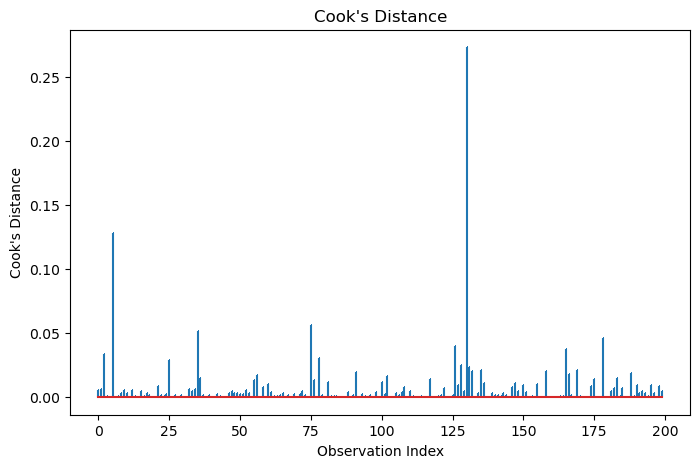

Influential points: [  2   5  25  35  75  78 126 128 130 131 132 135 158 165 169 178]
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     624.7
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           7.11e-95
Time:                        06:56:17   Log-Likelihood:                -342.45
No. Observations:                 184   AIC:                             692.9
Df Residuals:                     180   BIC:                             705.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [9]:
from statsmodels.stats.outliers_influence import OLSInfluence
import numpy as np
# Cook's Distance for detecting influential points
influence = OLSInfluence(model)
(c, p) = influence.cooks_distance
plt.figure(figsize=(8, 5))
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.title("Cook's Distance")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()

# Remove points with high Cook's Distance
threshold = 4 / len(X)  # General rule of thumb
outliers = np.where(c > threshold)[0]
print("Influential points:", outliers)

# Refit the model without influential points
X_clean = X.drop(index=outliers)
y_clean = y.drop(index=outliers)
model_clean = sm.OLS(y_clean, X_clean).fit()
print(model_clean.summary())


In [11]:
print(f"Omnibus Test: {model.summary2().tables[0]}")

Omnibus Test:                      0                 1                    2         3
0               Model:               OLS      Adj. R-squared:     0.896
1  Dependent Variable:             sales                 AIC:  780.3622
2                Date:  2025-01-10 06:56                 BIC:  793.5555
3    No. Observations:               200      Log-Likelihood:   -386.18
4            Df Model:                 3         F-statistic:     570.3
5        Df Residuals:               196  Prob (F-statistic):  1.58e-96
6           R-squared:             0.897               Scale:    2.8409


In [146]:
# Weighted Least Squares
weights = 1 / (residuals**2)
model_wls = sm.WLS(y, X, weights=weights).fit()
print(model_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.688e+05
Date:                Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:17:24   Log-Likelihood:                -229.17
No. Observations:                 200   AIC:                             466.3
Df Residuals:                     196   BIC:                             479.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.002    148.082      0.0

In [15]:
data = pd.DataFrame({
    'Temperature':[0,20,40,60,80,100],
    'Pressure':[0.002,0.0012,0.0060,0.0300,0.0900,0.2700]
})

,Temperature,Pressure
0,0,0.0020
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [26]:
X = data.iloc[:, :1].values
y = data.iloc[:, 1].values
X,y

(array([[  0],
        [ 20],
        [ 40],
        [ 60],
        [ 80],
        [100]]),
 array([0.002 , 0.0012, 0.006 , 0.03  , 0.09  , 0.27  ]))

In [40]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X, y)

LinearRegression()

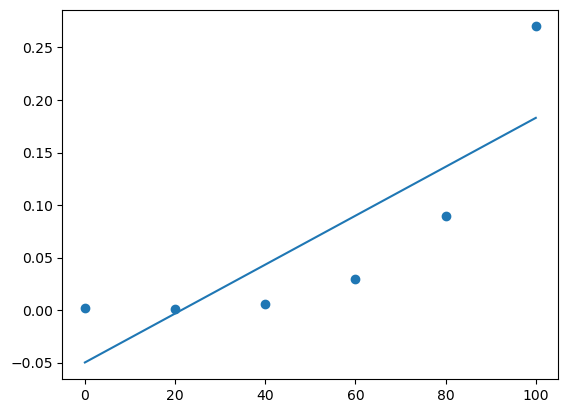

In [42]:
plt.scatter(X,y)
plt.plot(X,lin.predict(X))

In [54]:
from sklearn.preprocessing import PolynomialFeatures
print(X)
poly_t = PolynomialFeatures(degree=10)
X_t = poly_t.fit_transform(X)
poly_t.fit(X_t,y)
lin2 = LinearRegression()
lin2.fit(X_t, y)

[[  0]
 [ 20]
 [ 40]
 [ 60]
 [ 80]
 [100]]


LinearRegression()

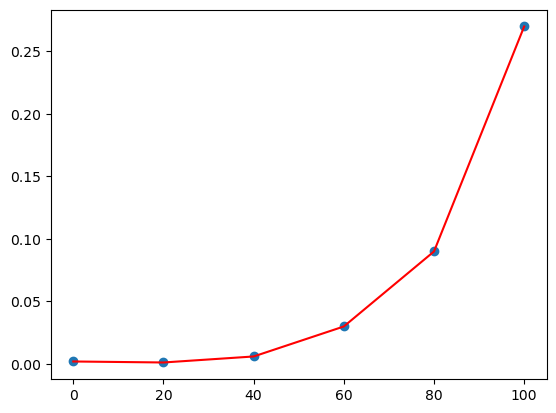

In [55]:
plt.scatter(X,y)
plt.plot(X,lin2.predict(X_t),color='red')